In [2]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

Данные

In [4]:
file = 'geo.xlsx'
xl = pd.ExcelFile(file)
df1 = xl.parse('Sheet1')

In [5]:
df1.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [6]:
y = df1['comment_class'].values

In [7]:
df1.pop('comment_class')
X = df1.values

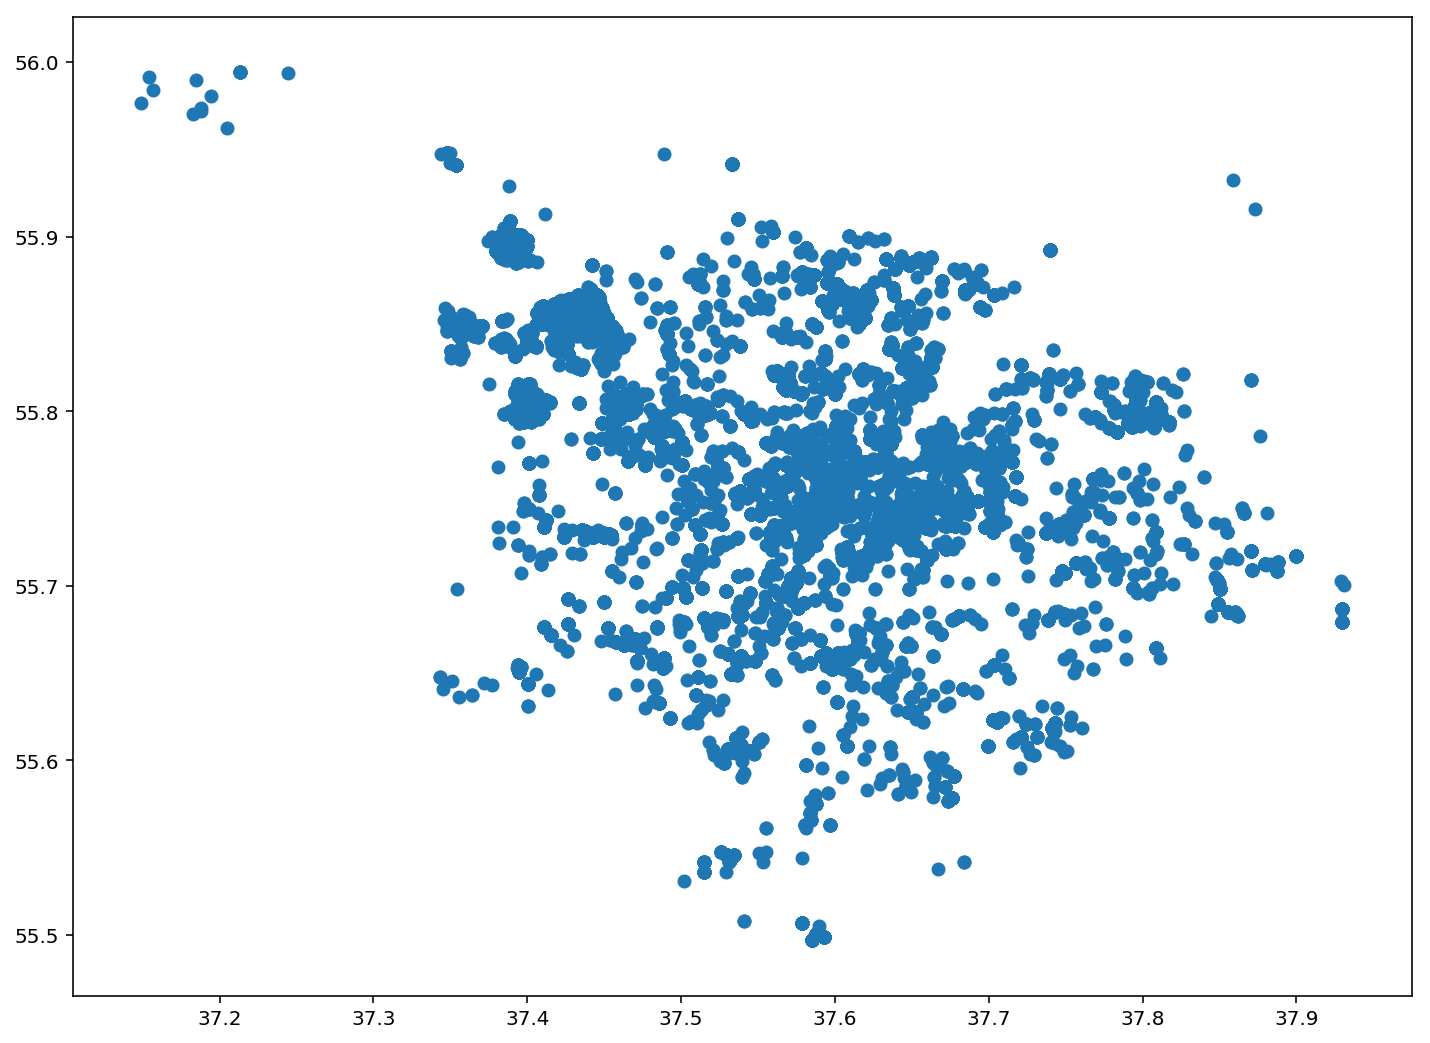

In [8]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,0],X[:,1])
plt.show()

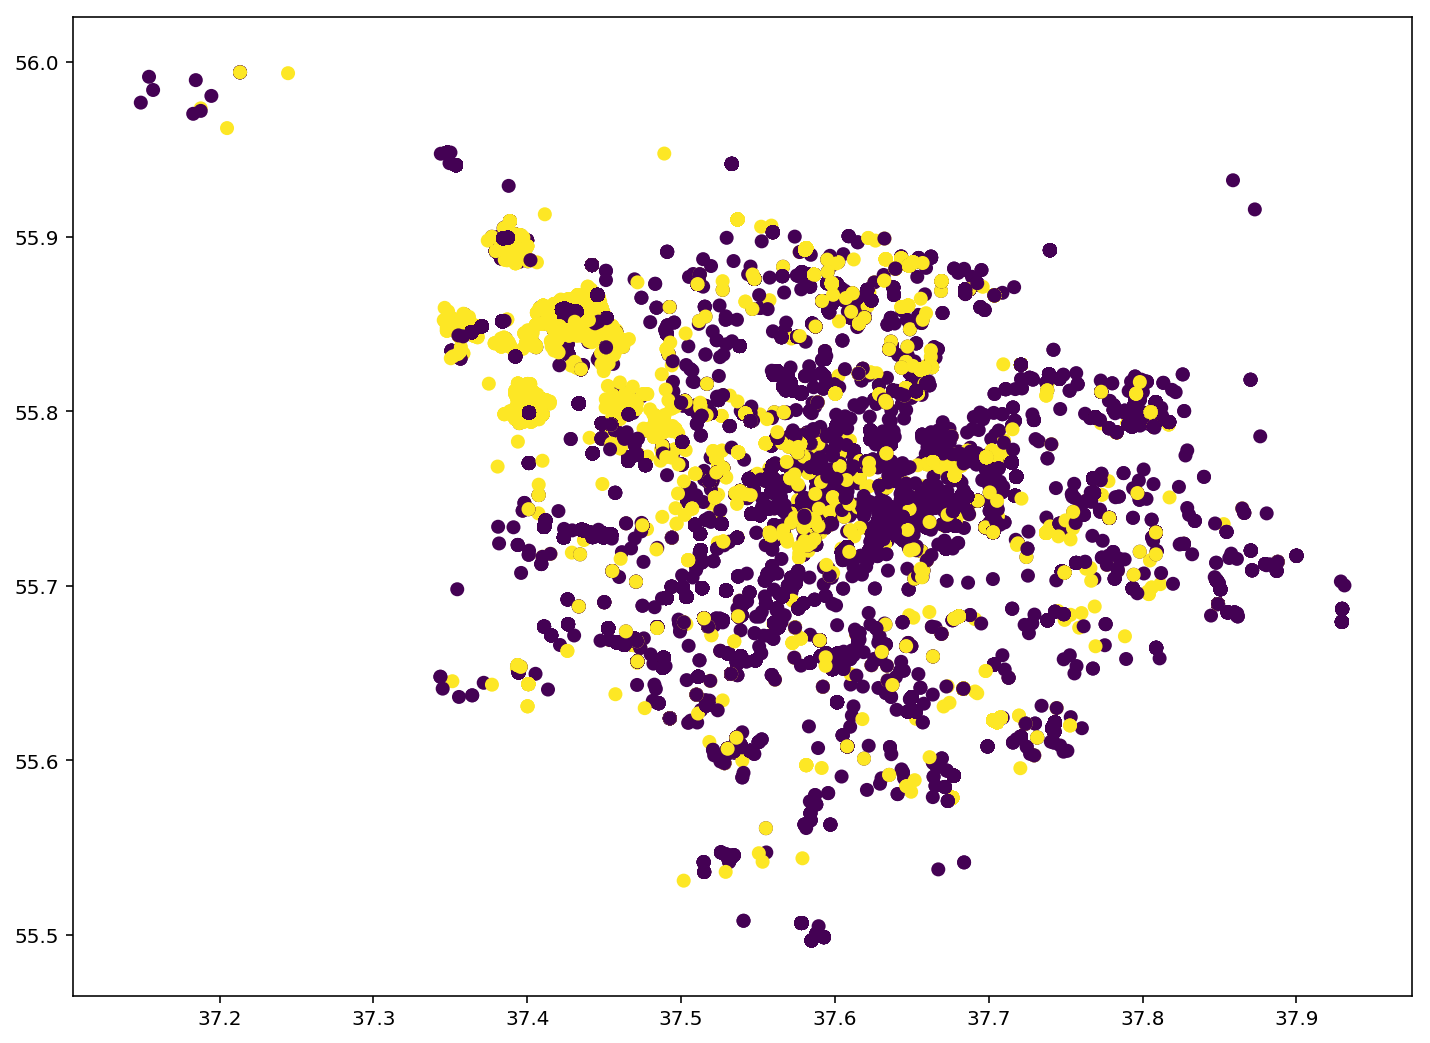

In [9]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

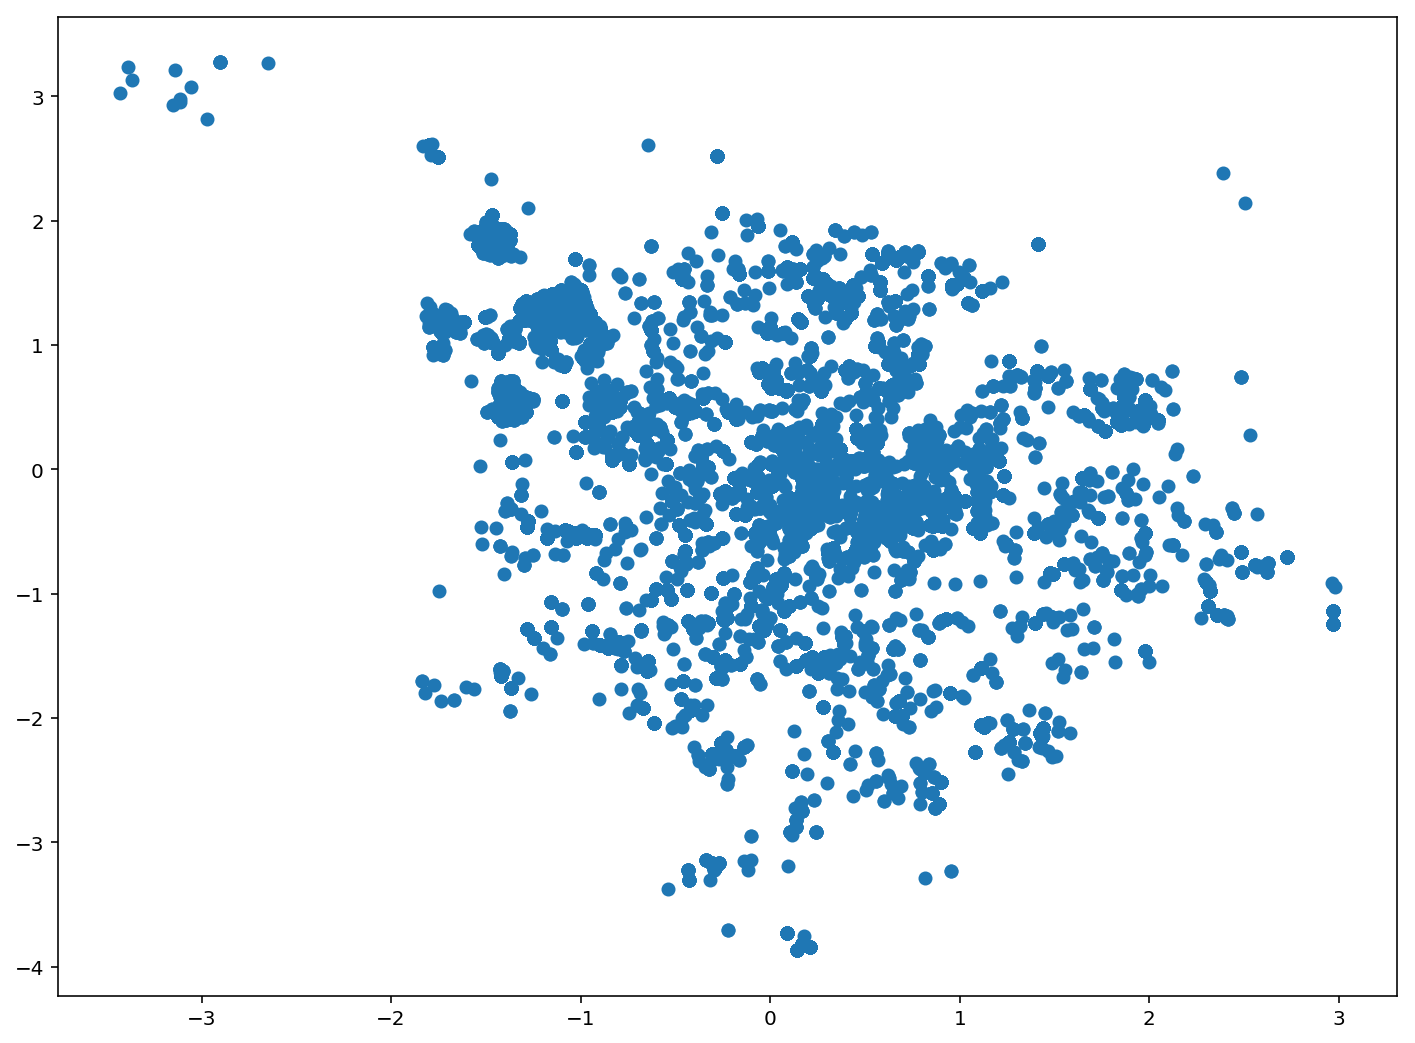

In [13]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.show()


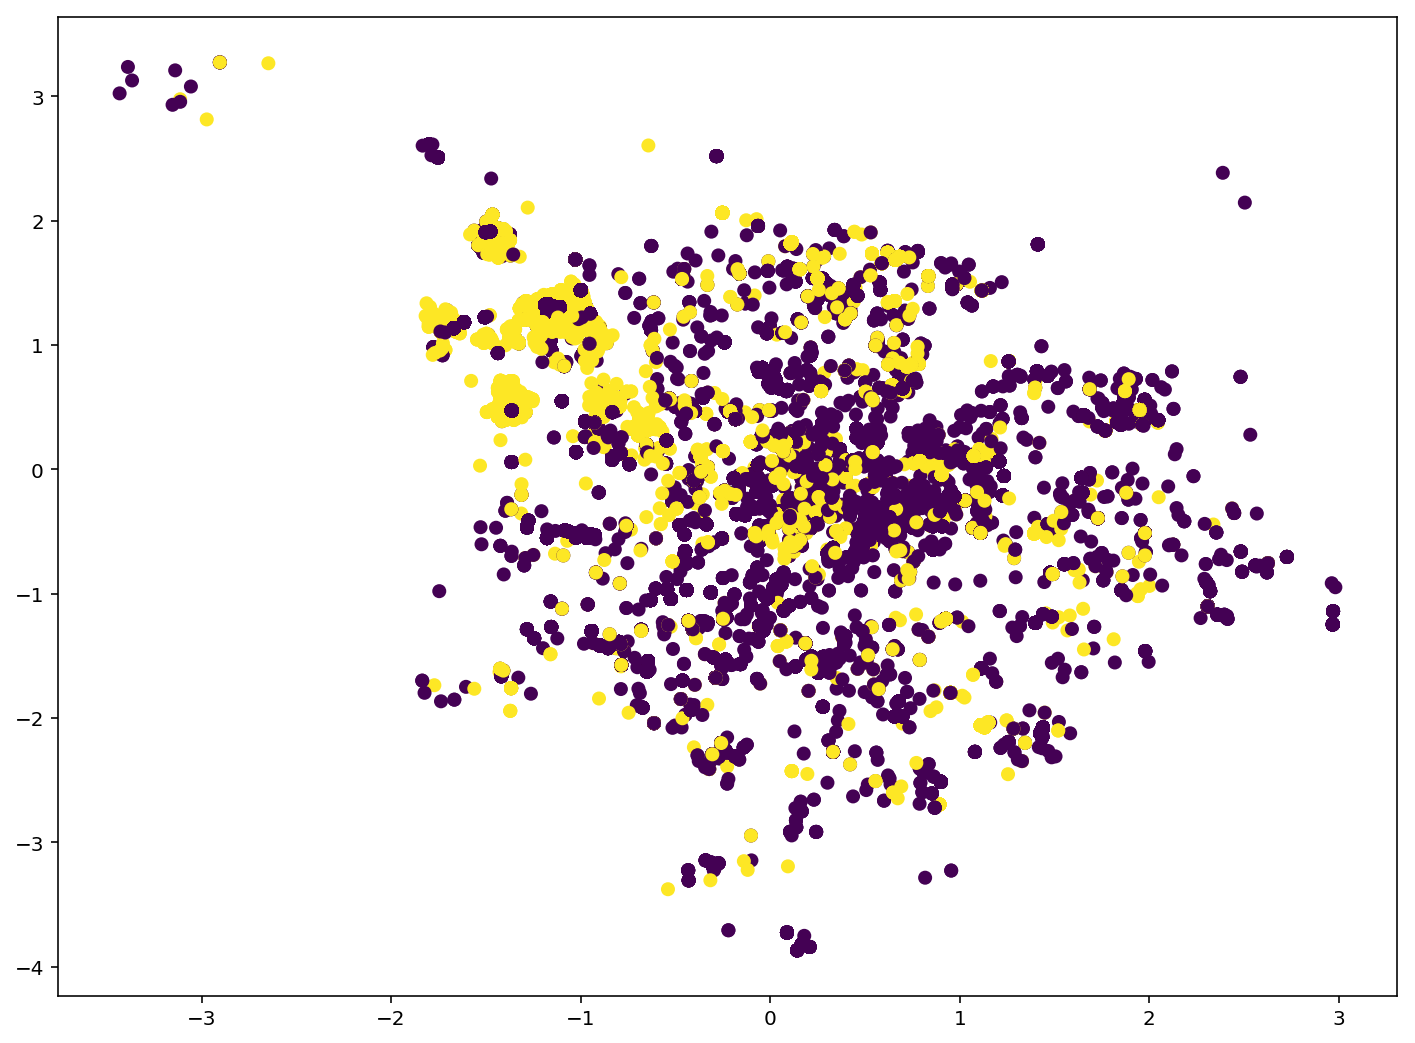

In [14]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= y)
plt.show()

Кластеризация

In [16]:
from sklearn.cluster import KMeans


In [17]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

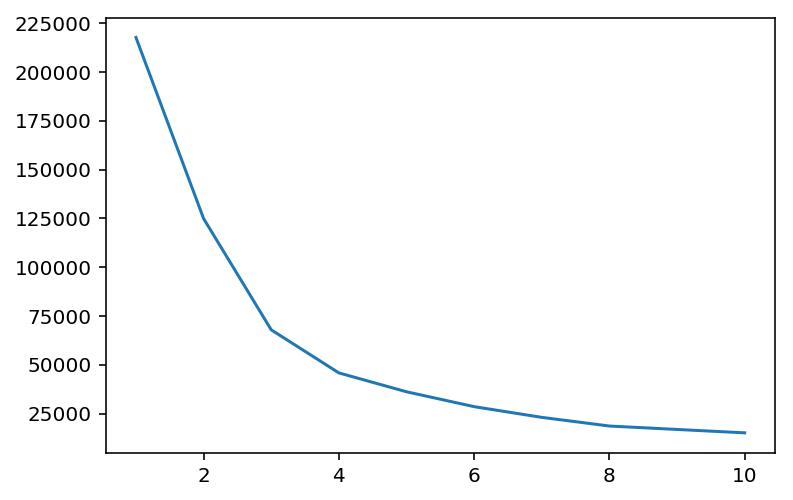

In [18]:
plt.plot(ks, k_inertia)

In [19]:
diff = np.diff(k_inertia)

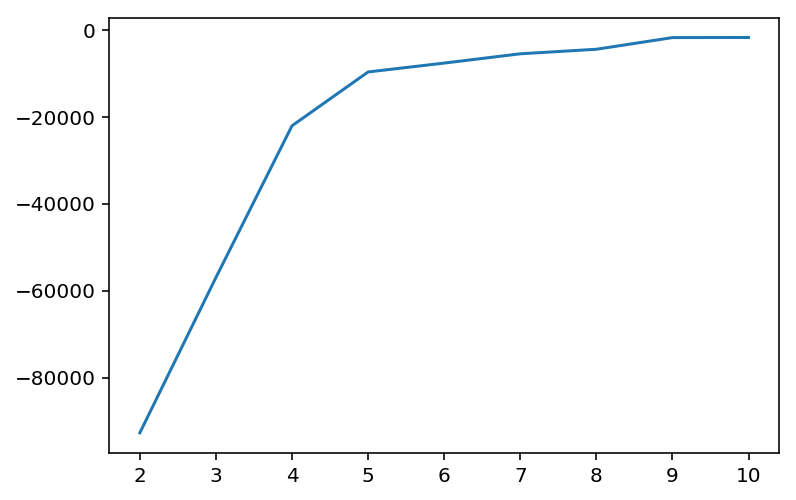

In [20]:
plt.plot(ks[1:], diff)

In [21]:
diff_r = diff[1:] / diff[:-1]

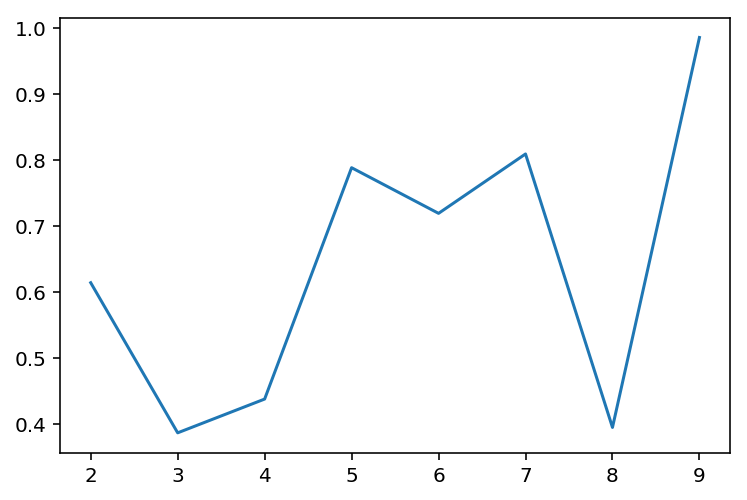

In [22]:
plt.plot(ks[1:-1], diff_r)

In [23]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3